# Analiza numeryczna - Pracownia 1
## Konrad Werbliński - 291878
### Zad 14

In [205]:
using PyPlot

## Procedura add

In [206]:
function add(n1, n2)
	x, xx, y, yy = n1[1], n1[2], n2[1], n2[2]
	r = x + y
	if abs(x) > abs(y)
		s = x - r + y + yy + xx
	else
		s = y - r + x + xx + yy
	end
   	z = r + s
	zz = r - z + s
	(z, zz)
end

add (generic function with 1 method)

## Procedura sub

In [207]:
function sub(n1, n2)
	x, xx, y, yy = n1[1], n1[2], n2[1], n2[2]
	r = x - y
	if abs(x) > abs(y)
		s = x - r - y - yy + xx
	else
		s = -y - r + x + xx - yy
	end
	z = r + s
	zz = r - z + s
	(z, zz)
end

sub (generic function with 1 method)

## Procedura mul

In [208]:
function mul1(x, y)
    #53 - Długość mantysy dla słowa 64-bitowego w standardzie IEEE754, 
    #przyjmując ze znak jest częścią mantysy, tak jak w artykule 
	t = 53
	c = 2 ^ (t - t / 2) + 1 
	p = x * c
	hx = x - p + p
	tx = x - hx
	p = y * c
	hy = y - p + p
	ty = y - hy
	p = hx * hy
	q = hx * ty + tx * hy
	z = p + q
	zz = p - z + q + tx * ty
	(z, zz)
end

function mul(n1, n2)
	x, xx, y, yy = n1[1], n1[2], n2[1], n2[2]
	c, cc = mul1(x, y)
	cc = x * yy + xx * y + cc
	z = c + cc
	zz = c - z + cc
	(z, zz)
end

mul (generic function with 1 method)

## Procedura divide

In [209]:
function divide(n1, n2)
	x, xx, y, yy = n1[1], n1[2], n2[1], n2[2]
	c = x / y
	u, uu = mul1(c, y)
	cc = (x - u - uu + xx - c * yy) / y
	z = c + cc
	zz = c - z + cc
	(z, zz)
end

divide (generic function with 1 method)

## Procedura sqroot

In [210]:
function sqroot(n)
    x, xx = n[1], n[2]
	if x > 0
		c = sqrt(x)
		u, uu = mul1(c, c)
		cc = (x - u - uu + xx) * 0.5 / c
		y = c + cc
		yy = c - y + cc
	else
		y = yy = 0
	end
	(y, yy)
end

sqroot (generic function with 1 method)

## Procedury cons i dest

Procedura tworzy reprezentacje x na dwóch słowach maszynowych typu takiego jakiego jest zmienna x.
Procedura dest rzutuje reprezentacje w postaci pary dwóch słów na podany w argumencie typ.

In [211]:
function cons(x) 
	mul1(x, 1.0)
end
	
function dest(x, t)
	t(x[1]) + t(x[2])
end

dest (generic function with 1 method)

# Testowanie zaimplementowanych procedur w pojedyńczych działaniach

Precyzja arymetyki jest zdefiniowana wzorem:
$$u = \frac{1}{2} 2  ^ {-t}$$
gdzie $t$ jest liczbą bitów kodujących mantysę.


W standardzie IEEE 754, mantysa słowa 64 bitowego ma 52 bity. 
Zatem, precyzja zmiennej typu Float64, będącego domyślnym typem zmiennopozycyjnym w języku Julia wynosi:
$$u = \frac{1}{2} 2  ^ {-52} = 1.110223e-16$$

Dla porównania precyzja zmiennej typu BigFloat, z długością ustawioną na 128 bitów wynosi (wywołanie $\verb+setprecision(BigFloat, 128)+$ ustawia długość mantysy na 128 bitów, https://docs.julialang.org/en/stable/stdlib/numbers/#BigFloats-1):
$$u = \frac{1}{2} 2  ^ {-128} = 1.4693679e-39$$

### Procedura testowa

Danymi wejściowymi są dwie pary liczb, będące liczbami zmiennopozycyjnymi w rozważanej w artykule reprezentacji.
Dane z tablicy test_data_binary i test_data_unary nie są jeszcze liczbami z tej reprezentacji, stają się nimi dopiero po podzieleniu drugiej liczby z pary przez $2^{t+1}$(dla $\verb+Float64+$ $t = 52$), co odbywa się już w funkcjach test_binary oraz test_unary.

Obliczenia są przeprowadzane na odpowiednich typach, następnie wyniki są przechowywane w 512 bitowej zmiennej typu BigFloat.

Testy mają na celu porównanie dokładności proponowanych w artykule metod reprezentacji oraz procedur wykonywania podstawowych działań matematycznych, z wbudowanymi operacjami arytmetycznymi języka Julia wykonywanymi na danych typu Big Float o długości 128 bitów. Jako próby kontrolnej, użyłem stadnardowego typu arytmetyki zmiennopozycyjnej języka Julia, czyli Float64. Wynikiem dokładnym jest wynik uzyskany przy pomocy 512 - bitowej arytmetyki BigFloat.

In [212]:
#jedna krotka, reprezentuje dwie pary liczb: (a, b) oraz (x, y)
test_data_binary = [(1.4, 1.2, 2.5, 1.5), 
                    (1.0, 1.0, 1.0, 1.00000000001), 
                    (9.0, 0.000003, 0.00000004, 0.0000000003),
                    (44.6, 0.001, 0.0000003, 0.0000000000001),
                    (1997.0, 0.001889, 0.000000729493, 0.000000000012),
                    (1.0, 1.6, 3.0, 3.9),
                    (0.00000003, 0.000000014, 30000000.2, 0.14),
                    (0.14, 0.001, 0.02, 0.003),
                    (0.64, 0.00001, 0.002, 0.0003),
                    (0.002314, 0.0002001, 22222222330332.2, 22220.3),
                    (19970605.0, 59.0, 44.0, 42.0),
                    (0.123213123, 0.0, 0.123213152, 0.0),
                    (0.987654321, 0.135434238853, 0.987654321,  0.135434238855),
                    (-5.0, -0.135434238853, -1.0,  -0.135434238855),
                    (-44.0, -0.453438853, -42.0,  -0.2435418855),
                    (1.4, 0.453438853, 1.4, 0.2435418855),
                    (-1.0, -1.6, 3.0, 3.9),
                    (0.00000003, -0.000000014, -30000000.2, 0.14),
                    (0.234, 0.001, -20.02, -0.3),
                    (0.055, 0.00001, 32., -0.3),
                    (9.0, 0.000003, -0.00000004, 0.0000000003),
                    (44.6, -0.001, 0.0000003, -0.0000000000001),
                    (-1.4, -1.2, -2.5, -1.5), 
                    (-1.0, -1.0, -1.0, -1.00000000001),
                    (-44.6, 0.001, 0.0000003, -0.0000000000001),
                    (-44.6, -0.001, -0.0000003, 0.0000000000001),
                    (-44.6, -0.001, 0.0000003, -0.0000000000001),
                    (44.6, 0.001, 0.0000003, -0.0000000000001),
                    (44.6, 0.000000000000000000000001, 0.0002343, 0.000000000000000000341)]

function test_binary(tested_fun, standard_fun)
    exp = 53 #przesunięcię drugiej wartości z pary tak aby znajdowała się poza mantysą pierwszej liczby z pary
    errors = Float64[]
    for (a, b, x, y) in test_data_binary
    
        setprecision(BigFloat, 128)

        float64_res = standard_fun(a + b / 2.0 ^ exp, x + y / 2.0 ^ exp)
        bigfloat128_res = standard_fun(BigFloat(a) + BigFloat(BigFloat(b) / 2.0 ^ exp),  
                                       BigFloat(x) + BigFloat(BigFloat(y) / 2.0 ^ exp))

        (e, ee) = tested_fun((a, b / 2.0 ^ exp), (x, y / 2.0 ^ exp))

        setprecision(BigFloat, 1024)
        tested_rep_res = BigFloat(e) + BigFloat(ee)

        exact_res = standard_fun(BigFloat(a) + BigFloat(BigFloat(b) / 2.0 ^ exp),
                                 BigFloat(x) + BigFloat(BigFloat(y) / 2.0 ^ exp))

        println("Błąd względny testowanej reprezentacji: ", Float64(abs(exact_res - tested_rep_res) / abs(exact_res))) 
        println("Błąd względny 128-bitowego big floata: ", Float64(abs(exact_res - bigfloat128_res) / abs(exact_res)))
        println("Błąd względny float64: ", Float64(abs(exact_res - float64_res) / abs(exact_res)))
    
        println()
        push!(errors, Float64(abs(exact_res - tested_rep_res) / abs(exact_res)))
    end
    errors
end

test_binary (generic function with 1 method)

In [213]:
errors = Float64[]
append!(errors, test_binary(add, (x, y)-> x + y))


Błąd względny testowanej reprezentacji: 6.321000843117081e-33
Błąd względny 128-bitowego big floata: 0.0
Błąd względny float64: 3.700743415417188e-17

Błąd względny testowanej reprezentacji: 0.0
Błąd względny 128-bitowego big floata: 0.0
Błąd względny float64: 1.1102230246307074e-16

Błąd względny testowanej reprezentacji: 8.231240993917503e-37
Błąd względny 128-bitowego big floata: 2.3341521836416e-39
Błąd względny float64: 2.7011019077062414e-17

Błąd względny testowanej reprezentacji: 1.73776212787784e-33
Błąd względny 128-bitowego big floata: 1.512669006045734e-40
Błąd względny float64: 7.860354696448733e-17

Błąd względny testowanej reprezentacji: 2.546313169355779e-35
Błąd względny 128-bitowego big floata: 3.480482167734444e-40
Błąd względny float64: 1.6341496630080666e-17

Błąd względny testowanej reprezentacji: 0.0
Błąd względny 128-bitowego big floata: 0.0
Błąd względny float64: 6.938893903907227e-17

Błąd względny testowanej reprezentacji: 4.907440247287244e-34
Błąd względny 

29-element Array{Float64,1}:
 6.321e-33  
 0.0        
 8.23124e-37
 1.73776e-33
 2.54631e-35
 0.0        
 4.90744e-34
 2.40741e-33
 7.99776e-35
 2.90343e-33
 0.0        
 0.0        
 0.0        
 ⋮          
 2.67505e-34
 2.8082e-33 
 8.03685e-34
 8.23124e-37
 1.73776e-33
 6.321e-33  
 0.0        
 4.34662e-33
 4.34662e-33
 1.73776e-33
 4.34662e-33
 8.48846e-37

In [214]:
append!(errors, test_binary(sub, (x, y) -> x - y))

Błąd względny testowanej reprezentacji: 0.0
Błąd względny 128-bitowego big floata: 0.0
Błąd względny float64: 2.321375415125327e-16

Błąd względny testowanej reprezentacji: 0.0
Błąd względny 128-bitowego big floata: 0.0
Błąd względny float64: 1.9999998345092715e11

Błąd względny testowanej reprezentacji: 6.115786449924161e-34
Błąd względny 128-bitowego big floata: 2.3341522043896197e-39
Błąd względny float64: 2.7010945302291727e-17

Błąd względny testowanej reprezentacji: 4.3466219516472605e-33
Błąd względny 128-bitowego big floata: 1.5126690263955415e-40
Błąd względny float64: 7.860852660055341e-17

Błąd względny testowanej reprezentacji: 6.459655486733025e-34
Błąd względny 128-bitowego big floata: 3.4804821702772455e-40
Błąd względny float64: 1.6341286605835877e-17

Błąd względny testowanej reprezentacji: 0.0
Błąd względny 128-bitowego big floata: 0.0
Błąd względny float64: 1.2767564783189297e-16

Błąd względny testowanej reprezentacji: 2.675049636641706e-34
Błąd względny 128-bitoweg

58-element Array{Float64,1}:
 6.321e-33  
 0.0        
 8.23124e-37
 1.73776e-33
 2.54631e-35
 0.0        
 4.90744e-34
 2.40741e-33
 7.99776e-35
 2.90343e-33
 0.0        
 0.0        
 0.0        
 ⋮          
 4.90744e-34
 9.17608e-34
 3.51095e-34
 6.11579e-34
 4.34662e-33
 0.0        
 0.0        
 1.73776e-33
 1.73776e-33
 4.34662e-33
 1.73776e-33
 8.4885e-37 

In [215]:
append!(errors, test_binary(mul, (x, y) -> x * y))

Błąd względny testowanej reprezentacji: 9.860761315262647e-33
Błąd względny 128-bitowego big floata: 6.717110578473281e-40
Błąd względny float64: 2.8548592061789737e-17

Błąd względny testowanej reprezentacji: 1.2325951644201566e-32
Błąd względny 128-bitowego big floata: 1.232595266393212e-43
Błąd względny float64: 1.1102354424370654e-27

Błąd względny testowanej reprezentacji: 8.914400704709345e-34
Błąd względny 128-bitowego big floata: 1.5989496789389058e-40
Błąd względny float64: 3.759628705603758e-17

Błąd względny testowanej reprezentacji: 2.649433442227657e-33
Błąd względny 128-bitowego big floata: 1.5776535332234646e-39
Błąd względny float64: 6.151077383361922e-17

Błąd względny testowanej reprezentacji: 1.551439852224162e-33
Błąd względny 128-bitowego big floata: 6.6354520307201015e-40
Błąd względny float64: 2.5290487625019812e-17

Błąd względny testowanej reprezentacji: 7.231224964525939e-33
Błąd względny 128-bitowego big floata: 9.403954814971491e-40
Błąd względny float64: 1.

87-element Array{Float64,1}:
 6.321e-33  
 0.0        
 8.23124e-37
 1.73776e-33
 2.54631e-35
 0.0        
 4.90744e-34
 2.40741e-33
 7.99776e-35
 2.90343e-33
 0.0        
 0.0        
 0.0        
 ⋮          
 3.70366e-33
 1.62218e-34
 3.09744e-35
 1.7871e-33 
 2.64943e-33
 9.86076e-33
 1.2326e-32 
 2.64943e-33
 1.23891e-33
 1.23891e-33
 1.23891e-33
 3.16283e-34

In [216]:
append!(errors, test_binary(divide, (x, y) -> x / y))

Błąd względny testowanej reprezentacji: 6.744056399545704e-33
Błąd względny 128-bitowego big floata: 1.3350257270850737e-39
Błąd względny float64: 1.3005469717037549e-16

Błąd względny testowanej reprezentacji: 1.2325952664055379e-43
Błąd względny 128-bitowego big floata: 1.2325952664055379e-43
Błąd względny float64: 2.2204460492392108e-16

Błąd względny testowanej reprezentacji: 4.788274245339254e-34
Błąd względny 128-bitowego big floata: 6.267898258132541e-40
Błąd względny float64: 2.1755191091163185e-17

Błąd względny testowanej reprezentacji: 6.401798220729424e-33
Błąd względny 128-bitowego big floata: 9.502470932033079e-40
Błąd względny float64: 5.652545788525761e-17

Błąd względny testowanej reprezentacji: 2.993683124922454e-33
Błąd względny 128-bitowego big floata: 2.002297074695729e-39
Błąd względny float64: 8.152910315276449e-17

Błąd względny testowanej reprezentacji: 2.7404699155334106e-32
Błąd względny 128-bitowego big floata: 1.782833097652828e-39
Błąd względny float64: 7.

116-element Array{Float64,1}:
 6.321e-33  
 0.0        
 8.23124e-37
 1.73776e-33
 2.54631e-35
 0.0        
 4.90744e-34
 2.40741e-33
 7.99776e-35
 2.90343e-33
 0.0        
 0.0        
 0.0        
 ⋮          
 1.11376e-33
 3.22691e-33
 1.3248e-34 
 3.98067e-34
 2.25299e-33
 6.74406e-33
 1.2326e-43 
 2.25299e-33
 1.45601e-33
 1.45601e-33
 1.45601e-33
 2.66999e-34

In [217]:
test_data_unary = [(1.4, 1.2), (2.5, 1.5), (1.0, 1.0), 
                   (9.0, 0.000003), (0.00000004, 0.0000000003),
                   (44.6, 0.001), (0.0000003, 0.0000000000001),
                   (1997.0, 0.001889), (2.000000729493, 0.000012),
                   (3.0, 2.0), (5.0, 4.0),
                   (0.00000003, 0.000000014), (30000000.2, 0.14),
                   (0.900014, 0.001), (0.902, 0.3),
                   (0.9000014, 0.00001), (0.9002, 0.3),
                   (0.002314, 0.00002001), (22222222330332.2, 22220.3),
                   (19970605.0, 59.0), (44.0, 42.0),
                   (0.123213123, 0.0), (0.123213152, 0.0),
                   (0.987654321, 0.135434238853), (0.987654321,  0.135434238855),
                   (1.0, -0.135434238853), (0.232323,  -0.0135434238855),
                   (43.0, -42.453438853), (44.0,  -0.2435418855),
                   (1.4, 0.453438853), (1.4, 0.2435418855)]

function test_unary(tested_fun, standard_fun)
    exp = 53 #przesunięcię drugiej wartości z pary tak aby znajdowała się poza mantysą pierwszej liczby z pary
    errors = Float64[]
    for (a, b) in test_data_unary

        setprecision(BigFloat, 128)

        float64_res = standard_fun(a + b / 2.0 ^ exp)
        bigfloat128_res = standard_fun(BigFloat(a) + BigFloat(BigFloat(b) / 2.0 ^ exp))  

        (e, ee) = tested_fun((a, b / 2.0 ^ exp))

        setprecision(BigFloat, 1024)
        tested_rep_res = BigFloat(e) + BigFloat(ee)

        exact_res = standard_fun(BigFloat(a) + BigFloat(BigFloat(b) / 2.0 ^ exp))
                                
        println("Błąd względny testowanej reprezentacji: ", Float64(abs(exact_res - tested_rep_res) / abs(exact_res))) 
        println("Błąd względny 128-bitowego big floata: ", Float64(abs(exact_res - bigfloat128_res) / abs(exact_res)))
        println("Błąd względny float64: ", Float64(abs(exact_res - float64_res) / abs(exact_res)))

        println()
        push!(errors, Float64(abs(exact_res - tested_rep_res) / abs(exact_res)))
    end
    errors
end

test_unary (generic function with 1 method)

In [218]:
append!(errors, test_unary(sqroot, sqrt))

Błąd względny testowanej reprezentacji: 3.0141182996848046e-33
Błąd względny 128-bitowego big floata: 2.471190618843608e-39
Błąd względny float64: 3.8697612991810854e-17

Błąd względny testowanej reprezentacji: 6.62319196124428e-35
Błąd względny 128-bitowego big floata: 1.8542486301040623e-39
Błąd względny float64: 2.7025825950183766e-17

Błąd względny testowanej reprezentacji: 1.5407439555097885e-33
Błąd względny 128-bitowego big floata: 8.552847072295025e-50
Błąd względny float64: 5.551115123125782e-17

Błąd względny testowanej reprezentacji: 1.3061046630532132e-39
Błąd względny 128-bitowego big floata: 1.3061046630532132e-39
Błąd względny float64: 1.8503717077085943e-23

Błąd względny testowanej reprezentacji: 9.37265074658599e-34
Błąd względny 128-bitowego big floata: 1.3279127193442926e-39
Błąd względny float64: 3.704412197456063e-17

Błąd względny testowanej reprezentacji: 3.340700808615793e-33
Błąd względny 128-bitowego big floata: 1.1981885703745532e-39
Błąd względny float64: 1

147-element Array{Float64,1}:
 6.321e-33  
 0.0        
 8.23124e-37
 1.73776e-33
 2.54631e-35
 0.0        
 4.90744e-34
 2.40741e-33
 7.99776e-35
 2.90343e-33
 0.0        
 0.0        
 0.0        
 ⋮          
 3.24385e-33
 9.67136e-34
 1.61777e-34
 7.0205e-34 
 2.8448e-33 
 4.4512e-33 
 2.8261e-35 
 2.05407e-34
 6.3178e-35 
 1.47734e-33
 3.44063e-34
 3.85911e-35

### Wnioski z przeprowadzonych testów

Łatwo zauważyć, żę wyniki procedur opisanych w artykule są znacznie dokładniejsze 
od tych uzyskanych przy pomocy zwykłej arytmetyki 64 bitowej, które stanowiły tylko próbę kontrolną,
ponieważ nie są w stanie przechowywać dokładnie danych wejściowych. Jeżeli jednak błąd testowancyh procedur byłby zbliżony, do błędu Floata 64 to oznaczało by to, że są one nieskuteczne.

Średni błąd względny wyniósł:

In [219]:
sum(errors) / length(errors)

2.3741126040460738e-33

Zauważmy, że jest to wartość o 6 rzędów wielkości większa niż precyzja arytmetyki BigFloat z długością ustawioną na 128 bitów.
Co widać również w wynikach przeprowadzonych pomiarów, w których arytmetyka BigFloat charakteryzowała się znacznie mniejszym błędem względnym.

Maksymalny błąd względny testowanych procedur wyniósł:

In [220]:
foldl(max, errors)

2.7404699155334106e-32

Czyli 16-rzędów wielkości mniej niż precyzja arytmetyki 64 bitowej.

Pozwala to nam przypuszczać, że wykorzystanie powyższych procedur przy znajdowaniu pierwiastków równania kwadratowego,
przyczyni się do zwiększenia dokładności otrzymywanych wyników.

Wykres błedów względnych testowanych procedur:

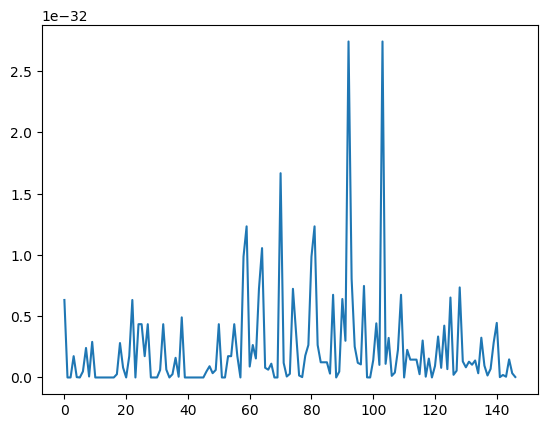

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003EC8C860>

In [221]:
plot(errors)

# Testowanie zaimplementowanych procedur, w wykonywaniu działanań wielokrotnie

W przeprowadzonych niżej obliczeniach, za wartość dokładną posłuży wynik tych obliczeń w arytmetyce $\verb+BigFloat+$ 2048.

## Obliczenia iterowane, bez utraty cyfr znaczących

Aby sprawdzić dokładność procedur proponowanych w artykule, w sytuacji iterowania operacji arytetycznych, będziemy przybliżać $\pi$ kolejnymi wyrazami ciągu $x_k = 2^k \sin \frac{\pi}{2^k}$, wyrazy te wyznaczymy za pomocą zależności rekurencyjnej:

$$k \in \{2,3,4,\dots\}$$ 

$$x_{k+1} = x_k \sqrt{\frac{2x_k}{x_k + x_{k-1}}} $$    
$$x_1 = 2$$       
$$x_2 = 2\sqrt{2}$$

In [222]:
setprecision(BigFloat, 2048) 
errors = Float64[]

last_x = cons(2.0)
curr_x = mul(last_x, sqroot(last_x))

bf_last_x = BigFloat(2.0)
bf_curr_x = BigFloat(2.0) * sqrt(BigFloat(2.0))

for i in [1:200;]
    curr_x, last_x = mul(curr_x, sqroot(divide(add(curr_x, curr_x),add(curr_x, last_x)))), curr_x
    bf_curr_x, bf_last_x = bf_curr_x * sqrt(2 * bf_curr_x / (bf_curr_x + bf_last_x)), bf_curr_x
    
    push!(errors, Float64(abs(bf_curr_x - dest(curr_x, BigFloat)) / abs(bf_curr_x)))
end

### Błąd względny

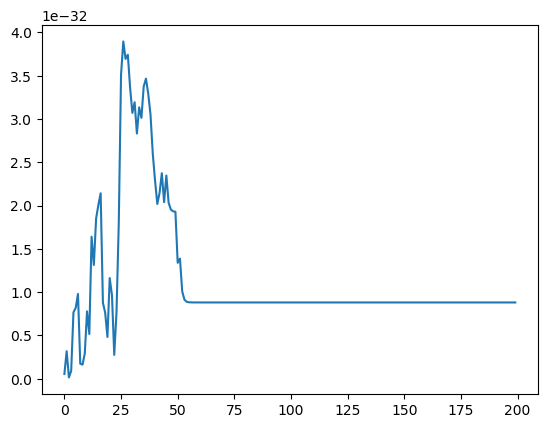

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003EF2B400>

In [223]:
plot(errors)

In [224]:
foldr(max, errors)

3.894703852084468e-32

## Obliczenia iterowane, w których zachodzi utrata cyfr znaczących

Aby sprawdzić dokładność procedur proponowanych w artykule, w sytuacji iterowania operacji arytetycznych, będziemy wyznaczać kolejne wartości funkcji sinus w w punktach $\frac{2\pi}{2^k}$ dla $k \in \{1,2,\dots\}$, korzystając z zależności rekurencyjnej:
$$\cos  \pi = -1$$

$$\cos  \frac{2\pi}{2^k} = \sqrt{\frac{\cos \frac{2\pi}{2 ^ {k - 1}} + 1}{2}}$$

$$\sin  \frac{2\pi}{2^k} = \sqrt{\frac{1 - \cos \frac{2\pi}{2 ^ {k - 1}}}{2}}$$

Zauważmy, że gdy $k \rightarrow \infty$, to $\cos  \frac{2\pi}{2^k} \rightarrow 1$, zatem zachodzi zjawisko utraty cyfr znaczących.

In [225]:
setprecision(BigFloat, 2048) 
errors = Float64[]

tested_rep_c = cons(-1.0)
bigfloat_c = BigFloat(-1.0)

for i in [1:200;]
    tested_rep_res = sqroot(mul(sub(cons(1.0), tested_rep_c), cons(0.5))) 
    tested_rep_c = sqroot(mul(add(tested_rep_c, cons(1.0)), cons(0.5)))
    
    bigfloat_res = sqrt((BigFloat(1.0) - bigfloat_c) / BigFloat(2.0))
    bigfloat_c = sqrt((bigfloat_c + BigFloat(1.0)) / BigFloat(2.0))
    
    push!(errors, Float64(abs(bigfloat_res - dest(tested_rep_res, BigFloat)) / abs(bigfloat_res)))
    foldr(max, errors)
    
end

### Błąd względny

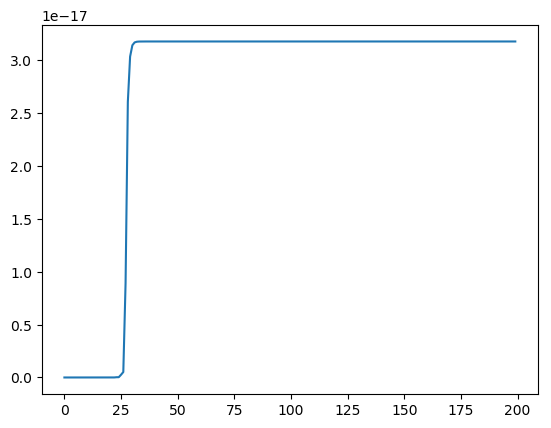

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003F179160>

In [226]:
plot(errors)

In [227]:
foldr(max, errors)

3.174035784072652e-17

## Wnioski z przeprowadzonego doświadczenia

Maksymalny błąd względny, w teście bez utraty cyfr znaczących, wyniośł $3.894703852084468e-32$ zatem był na poziomie błędów zaobserowanych przy pojedynczych działaniach. Maksymalny błąd względny, w teście z utratą cyfr znaczących wyniósł $3.174035784072652e-17$, zatem był porównywalny do precyzji arytmetyki Float64. Podobnie, jak w przypadku pojedynczych doświadczeń, wyniki pozwalają nam podejrzewać, że zastosowanie procedur proponowanych w artykule, do obliczania pierwiastków równania kwadratowego, znacznie zwiększy dokładność wyników obliczeń.




# Rozwiązywanie równań kwadratowych, z wykorzystaniem zaimplememtowanych procedur

## Procedura solve

Procedura solve do oblicznia pierwiastków równania, z wykorzystaniem reprezentacji oraz procedur operacji arytmetycnych opisanych w artykule.

In [228]:
function solve(a, b, c) 
    a_ = cons(a)
    b_ = cons(b)
    c_ = cons(c)
    
    delta = sub(mul(b_, b_), mul(cons(4.0), mul(a_, c_)))
    
    if dest(delta, Float64) < 0
        error("No solutions")
    end
    
    if(b > 0)
        x1 = divide(sub(cons(-b), sqroot(delta)), mul1(2.0, a))        
    else
        x1 = divide(add(cons(-b), sqroot(delta)), mul1(2.0, a))
    end
    
    if delta != cons(0.0)
        x2 = divide(c_, mul(x1, a_))
    else
        x2 = x1
    end
    
    x1, x2
end

solve (generic function with 1 method)

## Procedura solve_normal

Generyczna procedura solve_normal do oblicznia pierwiastków równania. Obliczenia będą przeprowadzane za pomocą arytmetyki Float64 oraz BigFloat o długości 128 bitów.

In [229]:
function solve_normal(a, b, c)
	delta = b * b - 4.0 * a * c
	
	if(b > 0.0)
		x1 = (-b - sqrt(delta)) / (2.0 * a)
	else
		x1 = (-b + sqrt(delta)) / (2.0 * a)
	end
	
    if delta > 0
        x2 = c / (x1 * a)
    else
        x2 = x1
    end
    
	x1, x2
end

solve_normal (generic function with 1 method)

## Procedura solve_naive

Generyczna procedura solve_naive do oblicznia pierwiastków równania. 
    Procedura oblicza pierwiastki wprost z definicji zatem jest podatna na utratę cyfr znaczących.

In [230]:
function solve_naive(a, b, c)
	delta = b * b - 4.0 * a * c
    if(b > 0.0)
        x1 = (-b - sqrt(delta)) / (2.0 * a)
        x2 = (-b + sqrt(delta)) / (2.0 * a)
    else
        x1 = (-b + sqrt(delta)) / (2.0 * a)
        x2 = (-b - sqrt(delta)) / (2.0 * a)
    end
	
	x1, x2
end

solve_naive (generic function with 1 method)

# Testowanie dokładności funkcji rozwiązujących równania kwadratowe

Proces testowania jest podobny jak w przy wcześniejszych testach. Jedyną różnicą jest fakt, że wszystkie dane początkowe procedury test (czyli współczynniki $a, b ,c$) są typu Float64. Dopiero przed wykonaniem obliczeń są konwerotwane na odpowiednie typy.

In [231]:
function test(a, b, c, r)  
    setprecision(BigFloat, 128)
    
    float64_res = solve_normal(a, b, c)
    bigfloat128_res = solve_normal(BigFloat(a), BigFloat(b), BigFloat(c)) 
    float64_naive_res = solve_naive(a, b, c)
    bigfloat128_naive_res = solve_naive(BigFloat(a), BigFloat(b), BigFloat(c)) 
    
    setprecision(BigFloat, 512)
    
    tested_rep_res = solve(a, b, c)
    
    exact_res = solve_normal(BigFloat(a), BigFloat(b), BigFloat(c)) 
 
    Float64(abs(exact_res[r] - dest(tested_rep_res[r], BigFloat)) / abs(exact_res[r])), 
    Float64(abs(exact_res[r] - bigfloat128_res[r]) / abs(exact_res[r])),
    Float64(abs(exact_res[r] - float64_res[r]) / abs(exact_res[r])),
    Float64(abs(exact_res[r] - bigfloat128_naive_res[r]) / abs(exact_res[r])),
    Float64(abs(exact_res[r] - float64_naive_res[r]) / abs(exact_res[r]))
end

test (generic function with 1 method)

### 1. Standardowe równanie kwadratowe (bez niebezpieczeńtwa utraty cyfr znaczących)

$$a = 3$$
$$b = -4$$
$$c = -5$$

#### Błędy względne naiwnego algorytmu z arytmetyką Float64 

In [232]:
e1 = test(3.0, -4.0, -5.0, 1)
e2 = test(3.0, -4.0, -5.0, 2)
e1[5],
e2[5]

(1.3645644245849177e-16, 1.7958527604523258e-16)

#### Błędy względne naiwnego algorytmu z arytmetyką BigFloat o długości 128 bitów

In [233]:
e1[4],
e2[4]

(5.84386552517668e-40, 3.4078986294905214e-39)

#### Błędy względne testowanych procedur

In [234]:
e1[1],
e2[1]

(1.447508646927704e-32, 3.4133599143969575e-32)

#### Błędy względne stadnardowych operatorów dla BigFloata o długości 128 bitów

In [235]:
e1[2],
e2[2]

(5.84386552517668e-40, 3.4078986294905214e-39)

#### Błędy względne stadnardowych operatorów dla Floata 64

In [236]:
e1[3],
e2[3]

(1.3645644245849177e-16, 2.4400248505777377e-16)

### 2. Utrata cyfr znaczących, przy odejmowaniu / dodawaniu pierwiastka z $\Delta$

$$ a = 1  $$
$$b = -3$$
$$c \rightarrow 0^{-}$$

Wtedy:

$$\sqrt{\Delta} \rightarrow 3^{+}$$ 

Zatem przy obliczaniu pierwiastka: $x = \frac{-b + \sqrt{\Delta}}{2a}$ dochodzi do utraty cyfr znaczących w naiwnym algorytmie nie wykorzystującym wzorów Vieta'a.

In [237]:
a = 1.0
b = -3.0

errors_tested_rep = Float64[]
errors_BigFloat = Float64[]
errors_Float64 = Float64[]
errors_BigFloat_naive = Float64[]
errors_Float64_naive = Float64[]
x_axis = Float64[]

c = -0.00000000002
for i in 1 : 200
    errs = test(a, b, c, 2)
    push!(errors_tested_rep, errs[1])
    push!(errors_BigFloat, errs[2])
    push!(errors_Float64, errs[3])
    push!(errors_BigFloat_naive, errs[4])
    push!(errors_Float64_naive, errs[5])
    push!(x_axis, c)
    c += 0.0000000000001
end

#### Błąd względny naiwnego algorytmu z arytmetyką Float64 

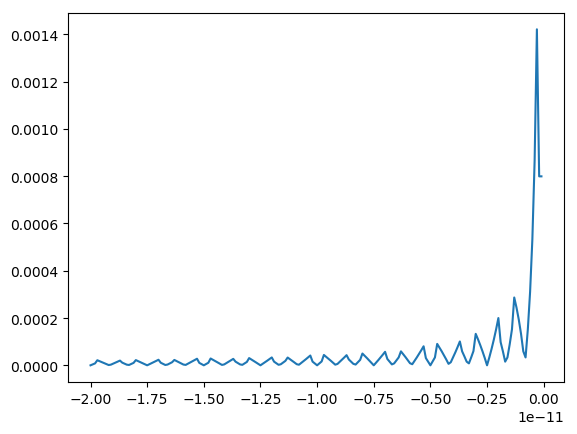

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003F372160>

In [238]:
plot(x_axis, errors_Float64_naive)

#### Błąd względny naiwnego algorytmu z arytmetyką BigFloat o długości 128 bitów

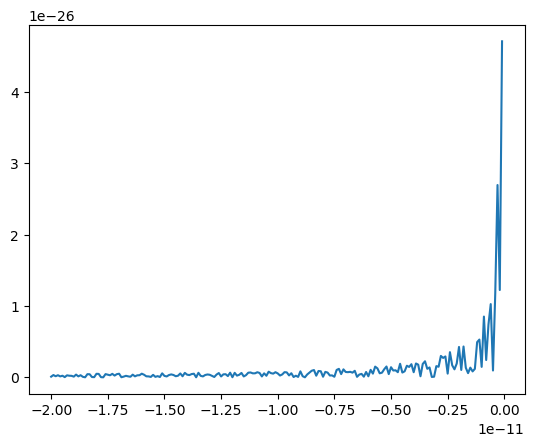

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003F6A89E8>

In [239]:
plot(x_axis, errors_BigFloat_naive)

#### Błąd względny testowanych procedur

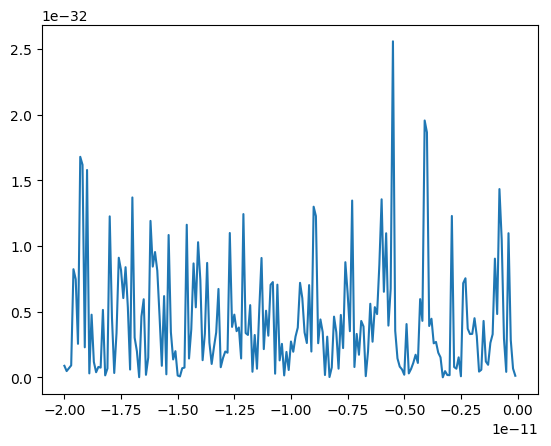

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003F8DA1D0>

In [240]:
plot(x_axis, errors_tested_rep)

#### Błąd względny stadnardowych operatorów dla BigFloata o długości 128 bitów

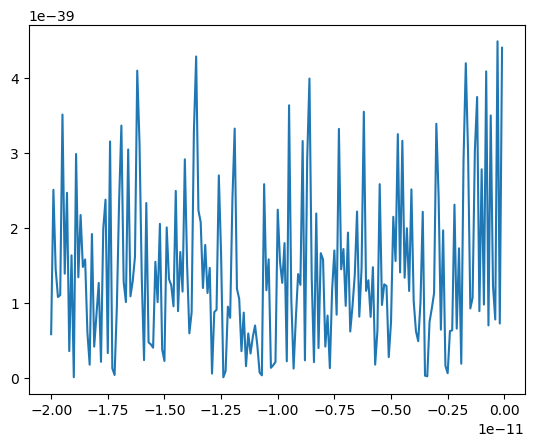

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003FB9DDD8>

In [241]:
plot(x_axis, errors_BigFloat)

#### Błąd względny stadnardowych operatorów dla Floata 64

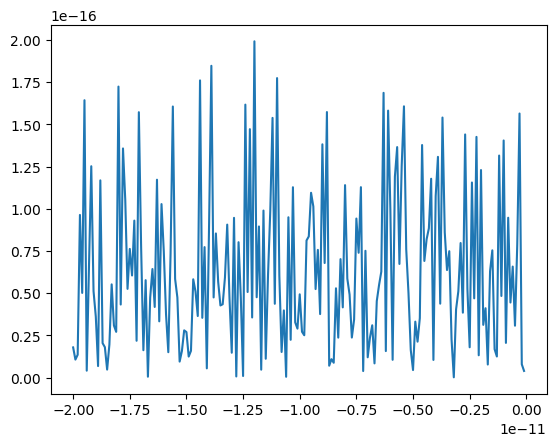

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003FE98048>

In [242]:
plot(x_axis, errors_Float64)

### 3. Utrata cyfr znaczących pod pierwiastkiem

$$a = 1$$
$$b \rightarrow -10^{-}$$
$$c = 25$$

Wtedy:
$$b^{2} \rightarrow 100^{+} = 4ac$$
Zatem podczas obliczania $\Delta$ dochodzi do utraty cyfr znaczących, której skutkom mają zapobiec testowane procedury zaproponowane w artykule.

In [243]:
a = 1.0
c = 25.0

errors_tested_rep = Float64[]
errors_BigFloat = Float64[]
errors_Float64 = Float64[]
errors_BigFloat_naive = Float64[]
errors_Float64_naive = Float64[]
x_axis = Float64[]

b = -10.00000000001
for i in 1 : 400
    errs = test(a, b, c, 2)
    push!(errors_tested_rep, errs[1])
    push!(errors_BigFloat, errs[2])
    push!(errors_Float64, errs[3])
    push!(errors_BigFloat_naive, errs[4])
    push!(errors_Float64_naive, errs[5])
    push!(x_axis, b)
    b += 0.000000000000025
end

#### Błąd względny naiwnego algorytmu z arytmetyką Float64 

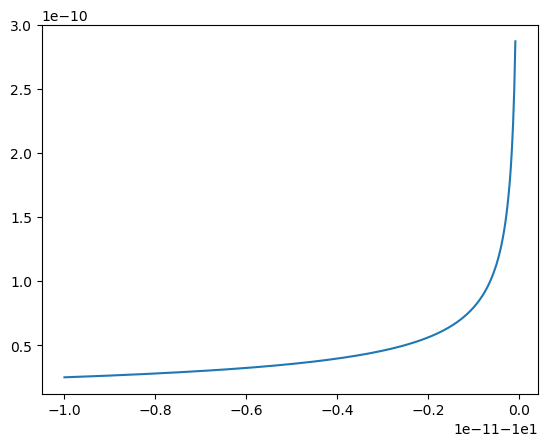

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003FFD8F28>

In [244]:
plot(x_axis, errors_Float64_naive)

#### Błąd względny naiwnego algorytmu z arytmetyką BigFloat o długości 128 bitów

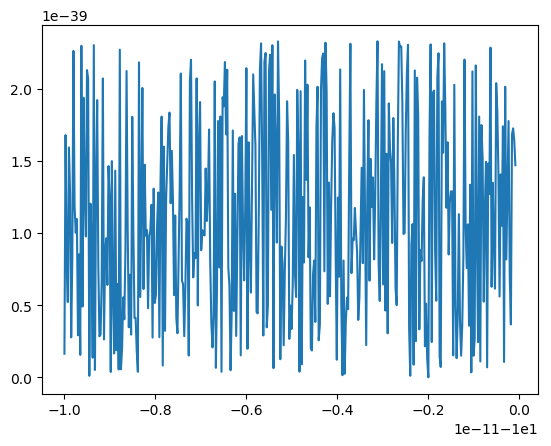

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000403F3E10>

In [245]:
plot(x_axis, errors_BigFloat_naive)

#### Błąd względny testowanych procedur

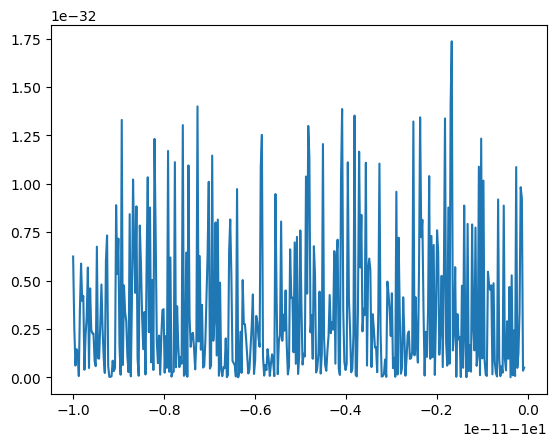

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000040777898>

In [246]:
plot(x_axis, errors_tested_rep)

#### Błąd względny stadnardowych operatorów dla BigFloata o długości 128 bitów

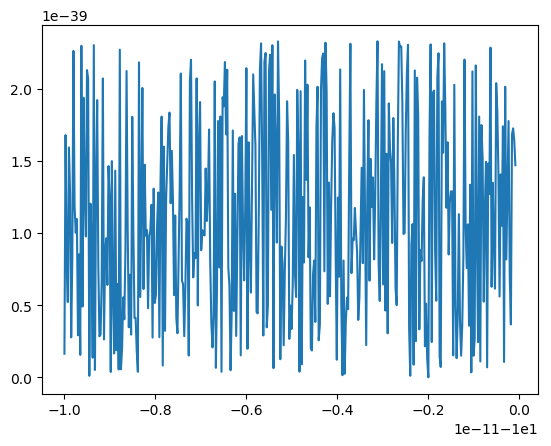

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000405B7080>

In [247]:
plot(x_axis, errors_BigFloat)

#### Błąd względny stadnardowych operatorów dla Floata 64

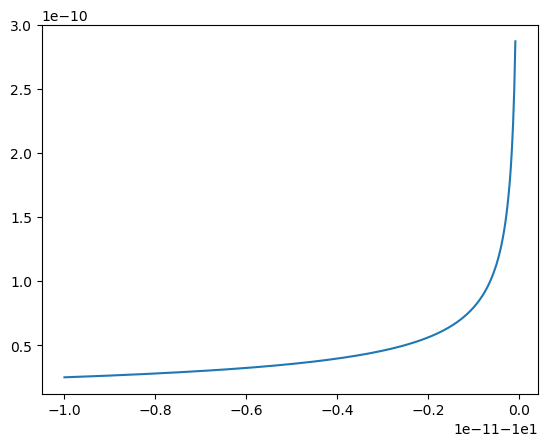

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000410A3AC8>

In [248]:
plot(x_axis, errors_Float64)

### Podwójna utrata cyfr znaczących

$$a = 1$$
$$b \rightarrow 0^{+}$$
$$c = min(b) ^ 2 * 0.2499999999999999$$

Zatem gdy $b^{+} \rightarrow 0$:
$$b^2 \rightarrow 4*ac \implies \Delta \rightarrow 0^{+}$$
oraz dla $b \gg 4ac$
$$\sqrt{\Delta} \approx b \implies -b + \sqrt{\Delta} \rightarrow 0^{+}$$ 

In [249]:
a = 1.0

errors_tested_rep = Float64[]
errors_BigFloat = Float64[]
errors_Float64 = Float64[]
errors_BigFloat_naive = Float64[]
errors_Float64_naive = Float64[]
x_axis = Float64[]

b =    0.0000000004
step = 0.000000000001
c = step * step * 0.2499999999999999

for i in 1 : 400
    errs = test(a, b, c, 2)
    push!(errors_tested_rep, errs[1])
    push!(errors_BigFloat, errs[2])
    push!(errors_Float64, errs[3])
    push!(errors_BigFloat_naive, errs[4])
    push!(errors_Float64_naive, errs[5])
    push!(x_axis, b)
    b -= step
end

#### Błąd względny naiwnego algorytmu z arytmetyką Float64 

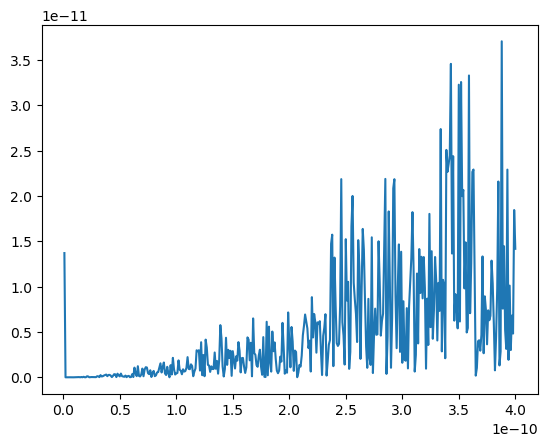

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000411F2358>

In [250]:
plot(x_axis, errors_Float64_naive)

#### Błąd względny naiwnego algorytmu z arytmetyką BigFloat o długości 128 bitów

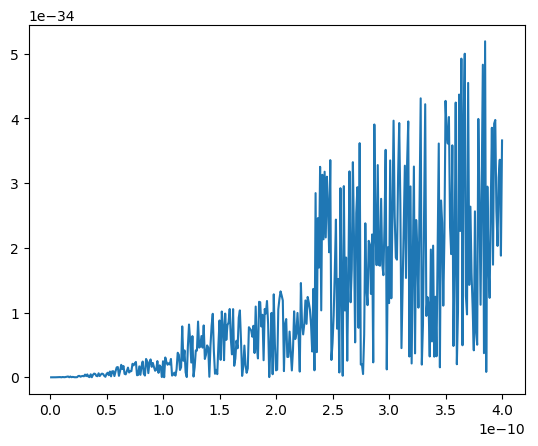

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000414785F8>

In [251]:
plot(x_axis, errors_BigFloat_naive)

#### Błąd względny testowanych procedur

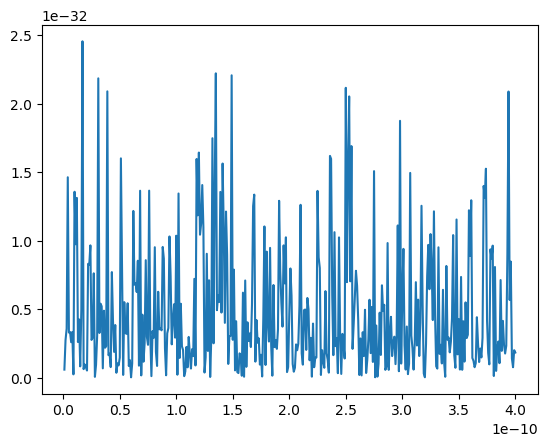

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000041591240>

In [252]:
plot(x_axis, errors_tested_rep)

#### Błąd względny stadnardowych operatorów dla BigFloata o długości 128 bitów

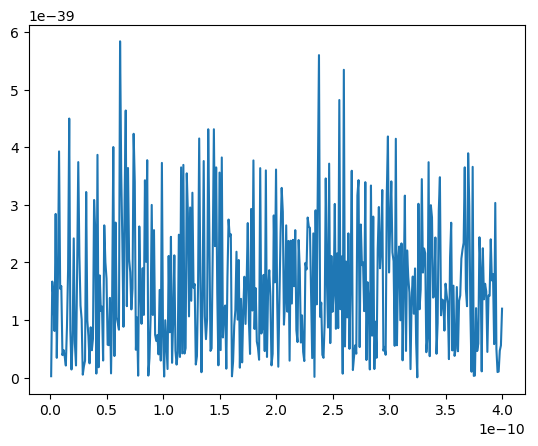

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000041B49E48>

In [253]:
plot(x_axis, errors_BigFloat)

#### Błąd względny stadnardowych operatorów dla Floata 64

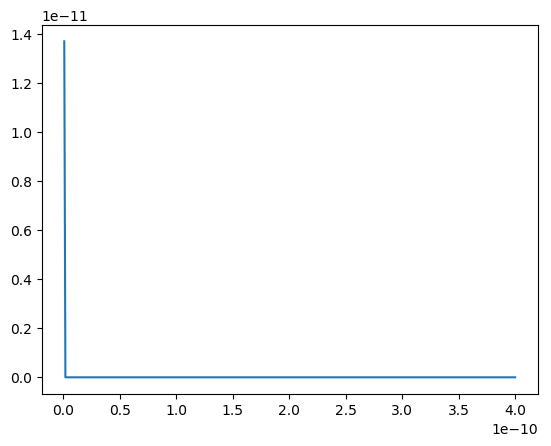

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000041C96EF0>

In [254]:
plot(x_axis, errors_Float64)

### Wnioski z przeprowadzonych testów

Algorytm wykorzystujący wzory Viete'a oraz, zaproponowane w artykule, procedury operacji arytmetycznych zwiększonej precyzji jest znacznie dokładniejszy niż algorytm z wzorami Viete'a liczący w standardowej arytmetyce Float64. Jest on jednak mniej dokładny od algorytmu wykorzystującego wzory Viete'a zaimlementowanego za pomocą arytmetyki BigFloat o długości 128 bitów. Wyniki te zgadzają się z wcześniejszymi obserwacjami dotyczącymi dokładności wykonywania działań arytmetycznych.

# Porównanie czasów działania

Porównam czasy działania 100000 - krotnego obliczenia pierwiastka kwadratowego.

In [255]:

setprecision(BigFloat, 128)

println("Czasy działania procedur proponowanych w artykule:")
for i in [1:5;]
    a = cons(725565643434.234234234)
    tic()
    for j in [1:100000;]
        a = sqroot(a)
    end
    toc()
end

println("\nCzasy działania 128 bitowego BigFloata:")
for i in [1:5;]
    b = BigFloat(725565643434.234234234)
    tic()
    for j in [1:100000;]
        b = sqrt(b)
    end
    toc()
end

Czasy działania procedur proponowanych w artykule:
elapsed time: 0.151791625 seconds
elapsed time: 0.180079922 seconds
elapsed time: 0.15337539 seconds
elapsed time: 0.148156307 seconds
elapsed time: 0.158907518 seconds

Czasy działania 128 bitowego BigFloata:
elapsed time: 0.130029453 seconds
elapsed time: 0.125379608 seconds
elapsed time: 0.162206503 seconds
elapsed time: 0.151693331 seconds
elapsed time: 0.117330905 seconds


Widzimy zatem, że czasy działania operacji pierwiastkowania, dla obydwu testowanych sposobów reprezentacji liczb zmiennopozycyjnych, są bardzo zbliżone.